## Отчет по лабораторной работе № 5 по теме: "Нейроконтроллер для персонажей компьютерных игр"
    Цель: необходимо построить нейронную сеть для управления поведением персонажа компьютерной игры в зависимости от обстановки окружающей среды.
### Исходные данные 
    Обучающая и тестовые выборки представлены в виде таблиц.
#### Обучающая выборка:
![Обучающая выборка](train_df.png)
#### Тестовая выборка:
![Тестовая выборка](test_df.png)

* здоровье (значения от 0 (плохое) до 2 (среднее))
* имеет нож (1 – имеет, 0 - нет)
* имеет пистолет (1 – имеет, 0 - нет)
* присутствует враг (количество врагов)
* последний столбец показывает принадлежность классу, т.е. действие:
     - уворачиваться
     - атаковать
     - прятаться
     - бежать
    
#### Архитектура нейронной сети:
![Архитектура](arch.png)
### Реализация
     Тестовая выборки была дополнена тремя примерами:
![Дополненная тестовая выборка](test_dfext.png)  
    В ходе выполнения работы были созданы две модели нейронной сети:
* Модель 1  
```python
model1_relu = models.Sequential()
model1_relu.add(Dense(512, input_shape=(4,)))
model1_relu.add(Activation('relu'))
model1_relu.add(Dropout(0.5))
model1_relu.add(Dense(4))
model1_relu.add(Activation('softmax'))
```
    Архитектура

![Модель1](model1true.png) 
    Визуализация процесса обучения

![Визуализация процесса обучения1](trprc1.png) 
    Проверка модели на дополненном тестовом наборе данных

In [165]:
ynew = model1.predict_classes(Xtest_ext)
print(ynew)
l = test_labels2_ext.beh.to_string(index = False)
l = [line.rstrip() for line in l]
str1 = ''.join(l)
print(str1.replace('',' '))

[0 2 1 2 2 2 3 0 3 3]
 0 2 1 2 2 2 3 0 2 3 


    
* Модель 2 
```python
model2 = models.Sequential()
model2.add(layers.Dense(3, activation = 'relu', input_shape=(4,)))
model2.add(layers.Dense(4, activation = 'softmax'))
```
    Архитектура
![Модель1](model2.png)
    Визуализация процесса обучения

![Визуализация процесса обучения1](trprc2.png) 
    Проверка модели на дополненном тестовом наборе данных

In [164]:
ynew = model2.predict_classes(Xtest_ext)
print(ynew)
l = test_labels2_ext.beh.to_string(index = False)
l = [line.rstrip() for line in l]
str1 = ''.join(l)
print(str1.replace('',' '))

[0 2 1 2 2 2 3 0 3 3]
 0 2 1 2 2 2 3 0 2 3 


    При проверки моделей на тестовом наборе данных они показали идентичные результаты.
#### Построение модели 1 с разными функциями активации.
![Модель1 функции активации1](activ1m1.png) 
![Модель1 функции активации2](activ2m1.png) 

In [1]:
!nvidia-smi

Tue Nov  9 22:52:33 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 440.64.00    CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:1A:00.0 Off |                    0 |
| N/A   34C    P0    42W / 300W |     11MiB / 32510MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  Tesla V100-SXM2...  Off  | 00000000:1C:00.0 Off |                    0 |
| N/A   31C    P0    42W / 300W |     11MiB / 32510MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  T

In [2]:
#Резервирование видеокарты
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '2' 

In [3]:
import pandas as pd

colnames=['health', 'knife', 'gun', 'enemies', 'beh'] 
train_data = pd.read_csv('data_train_lab5.csv', names=colnames, header=None)
train_data

,health,knife,gun,enemies,beh
0,2,0,0,0,dodge
1,2,0,0,1,dodge
2,2,0,1,1,attack
3,2,0,1,2,attack
4,2,1,0,2,hide
5,2,1,0,1,attack
6,1,0,0,0,dodge
7,1,0,0,1,hide
8,1,0,1,1,attack
9,1,0,1,2,hide


In [4]:
colnames=['health', 'knife', 'gun', 'enemies', 'beh'] 
test_data = pd.read_csv('data_test_lab5.csv', names=colnames, header=None)
test_data

,health,knife,gun,enemies,beh
0,2,1,1,1,attack
1,1,1,1,2,hide
2,0,0,0,0,dodge
3,0,1,1,1,hide
4,2,0,1,3,hide
5,2,1,0,3,hide
6,0,1,0,3,run


In [5]:
#names=['Health','Knife','Gun','Enemies','Kol-vo']
names=['health', 'knife', 'gun', 'enemies', 'beh']
dataTrain = pd.read_csv('data_train_lab5.csv',names=names)
realData = pd.read_csv('data_test_lab5.csv',names=names)

### Дополнение тестовой выборки

In [6]:
realData_ext = realData

new_row1 = {'health':1, 'knife':1, 'gun':1, 'enemies':1, 'beh': 'attack'} 
new_row2 = {'health':1, 'knife':0, 'gun':0, 'enemies':3, 'beh': 'hide'} 
new_row3 = {'health':0, 'knife':1, 'gun':1, 'enemies':2, 'beh':'run'} 

realData_ext = realData_ext.append(new_row1, ignore_index=True)
realData_ext = realData_ext.append(new_row2, ignore_index=True)
realData_ext = realData_ext.append(new_row3, ignore_index=True)
realData_ext

,health,knife,gun,enemies,beh
0,2,1,1,1,attack
1,1,1,1,2,hide
2,0,0,0,0,dodge
3,0,1,1,1,hide
4,2,0,1,3,hide
5,2,1,0,3,hide
6,0,1,0,3,run
7,1,1,1,1,attack
8,1,0,0,3,hide
9,0,1,1,2,run


### Создание обучающей и тестовой выборок

In [7]:
Xtest = realData.iloc[:,0:4]
print(Xtest)

   health  knife  gun  enemies
0       2      1    1        1
1       1      1    1        2
2       0      0    0        0
3       0      1    1        1
4       2      0    1        3
5       2      1    0        3
6       0      1    0        3


In [8]:
Xtest_ext = realData_ext.iloc[:,0:4]
print(Xtest_ext)

   health  knife  gun  enemies
0       2      1    1        1
1       1      1    1        2
2       0      0    0        0
3       0      1    1        1
4       2      0    1        3
5       2      1    0        3
6       0      1    0        3
7       1      1    1        1
8       1      0    0        3
9       0      1    1        2


In [9]:
Ytest = realData.select_dtypes(include=[object])
print(Ytest)  

      beh
0  attack
1    hide
2   dodge
3    hide
4    hide
5    hide
6     run


In [10]:
Ytest_ext = realData_ext.select_dtypes(include=[object])
print(Ytest_ext)  

      beh
0  attack
1    hide
2   dodge
3    hide
4    hide
5    hide
6     run
7  attack
8    hide
9     run


In [11]:
Xtrain = dataTrain.iloc[:,0:4]
print(Xtrain)

    health  knife  gun  enemies
0        2      0    0        0
1        2      0    0        1
2        2      0    1        1
3        2      0    1        2
4        2      1    0        2
5        2      1    0        1
6        1      0    0        0
7        1      0    0        1
8        1      0    1        1
9        1      0    1        2
10       1      1    0        2
11       1      1    0        1
12       0      0    0        0
13       0      0    0        1
14       0      0    1        1
15       0      0    1        2
16       0      1    0        2
17       0      1    0        1


In [12]:
Ytrain = dataTrain.select_dtypes(include=[object])
print(Ytrain)

       beh
0    dodge
1    dodge
2   attack
3   attack
4     hide
5   attack
6    dodge
7     hide
8   attack
9     hide
10    hide
11    hide
12   dodge
13    hide
14    hide
15     run
16     run
17    hide


### Преобразование классов (возможные действия персонажа), представленные в виде строк, в набор чисел 0, 1, 2, 3

In [13]:
# Преобразование данных для Keras
# Преобразуем метки классов (возможные действия персонажа), представленные в виде строк, в набор чисел 0, 1, 2, 3
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

train_labels2 = Ytrain.apply(le.fit_transform)
test_labels2 = Ytest.apply(le.fit_transform)
test_labels2_ext = Ytest_ext.apply(le.fit_transform)

print(train_labels2)
print(test_labels2)
print(test_labels2_ext)

    beh
0     1
1     1
2     0
3     0
4     2
5     0
6     1
7     2
8     0
9     2
10    2
11    2
12    1
13    2
14    2
15    3
16    3
17    2
   beh
0    0
1    2
2    1
3    2
4    2
5    2
6    3
   beh
0    0
1    2
2    1
3    2
4    2
5    2
6    3
7    0
8    2
9    3


In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, utils
print(tf.__version__)
print(tf.keras.__version__)

2.2.0
2.3.0-tf


### Преобразование меток классов в тензорный объект

In [15]:
#Преобразуем метки в тензорный объект, например, для 4 классов (с номерами 0, 1, 2, 3) метка класса 3 будет преобразована в массив: label3 -> [0, 0, 1, 0]
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels2)
test_labels = to_categorical(test_labels2)

print(train_labels)
print(test_labels)

[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]
[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


### Постороение модели нейроной сети

# Способ 1

In [16]:
# Построение модели нейронной сети
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow.keras.layers import Activation, Dense, Dropout

model1_relu = models.Sequential()
model1_relu.add(Dense(512, input_shape=(4,)))#max_words
model1_relu.add(Activation('relu'))
model1_relu.add(Dropout(0.5))
model1_relu.add(Dense(4))#num_classes
model1_relu.add(Activation('softmax'))

In [17]:
model1_selu = models.Sequential()
model1_selu.add(Dense(512, input_shape=(4,)))#max_words
model1_selu.add(Activation('selu'))
model1_selu.add(Dropout(0.5))
model1_selu.add(Dense(4))#num_classes
model1_selu.add(Activation('softmax'))

In [18]:
model1_sigmoid = models.Sequential()
model1_sigmoid.add(Dense(512, input_shape=(4,)))#max_words
model1_sigmoid.add(Activation('sigmoid'))
model1_sigmoid.add(Dropout(0.5))
model1_sigmoid.add(Dense(4))#num_classes
model1_sigmoid.add(Activation('softmax'))

In [19]:
model1_elu = models.Sequential()
model1_elu.add(Dense(512, input_shape=(4,)))#max_words
model1_elu.add(Activation('elu'))
model1_elu.add(Dropout(0.5))
model1_elu.add(Dense(4))#num_classes
model1_elu.add(Activation('softmax'))

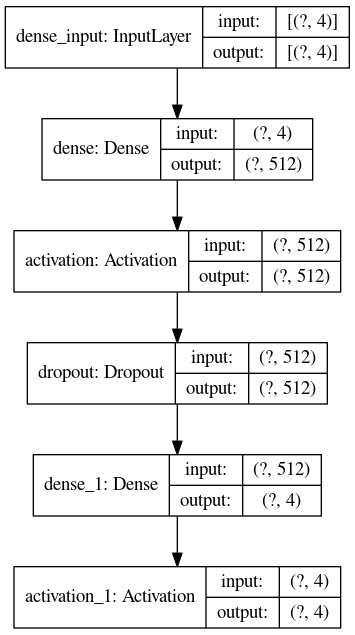

In [21]:
from tensorflow.keras.utils import plot_model
plot_model(model1_softmax, to_file='model1.png', show_shapes=True)

In [22]:
# Общая информация о модели
model1_relu.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               2560      
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 2052      
_________________________________________________________________
activation_3 (Activation)    (None, 4)                 0         
Total params: 4,612
Trainable params: 4,612
Non-trainable params: 0
_________________________________________________________________


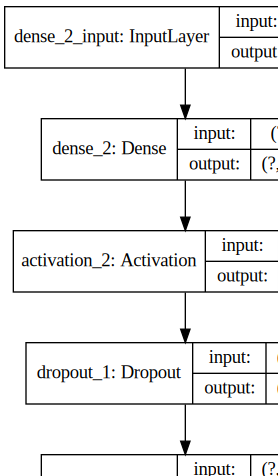

In [23]:
# Визуализация модели
from IPython.display import SVG, display
from tensorflow.python.keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model1_relu, show_shapes=True).create(prog='dot', format='svg'))

In [22]:
# Компиляция модели
from tensorflow.keras.optimizers import SGD

opt = SGD(lr = 0.01, momentum = 0.9)

model1_relu.compile(optimizer = opt,       
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [20]:
model1_selu.compile(optimizer = opt,       
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [26]:
model1_sigmoid.compile(optimizer = opt,       
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [23]:
model1_elu.compile(optimizer = opt,       
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [27]:
# Обучение модели
history_relu = model1_relu.fit(Xtrain, train_labels, validation_data = (Xtest, test_labels), epochs = 200, batch_size = 1)

Epoch 1/200
18/18 [==============================] - 0s 9ms/step - loss: 1.4384 - accuracy: 0.1667 - val_loss: 0.9035 - val_accuracy: 0.5714
Epoch 2/200
18/18 [==============================] - 0s 9ms/step - loss: 1.1496 - accuracy: 0.5556 - val_loss: 0.8997 - val_accuracy: 0.7143
Epoch 3/200
18/18 [==============================] - 0s 3ms/step - loss: 1.0804 - accuracy: 0.6667 - val_loss: 0.6674 - val_accuracy: 0.5714
Epoch 4/200
18/18 [==============================] - 0s 2ms/step - loss: 0.9747 - accuracy: 0.5556 - val_loss: 0.7733 - val_accuracy: 0.7143
Epoch 5/200
18/18 [==============================] - 0s 2ms/step - loss: 0.7836 - accuracy: 0.7222 - val_loss: 0.6973 - val_accuracy: 0.7143
Epoch 6/200
18/18 [==============================] - 0s 2ms/step - loss: 1.1834 - accuracy: 0.6111 - val_loss: 0.6326 - val_accuracy: 0.8571
Epoch 7/200
18/18 [==============================] - 0s 2ms/step - loss: 0.7579 - accuracy: 0.6111 - val_loss: 0.4103 - val_accuracy: 1.0000
Epoch 8/200
1

Epoch 59/200
18/18 [==============================] - 0s 2ms/step - loss: 0.0475 - accuracy: 1.0000 - val_loss: 0.0283 - val_accuracy: 1.0000
Epoch 60/200
18/18 [==============================] - 0s 3ms/step - loss: 0.4801 - accuracy: 0.8333 - val_loss: 0.0624 - val_accuracy: 1.0000
Epoch 61/200
18/18 [==============================] - 0s 2ms/step - loss: 0.1479 - accuracy: 0.9444 - val_loss: 0.1986 - val_accuracy: 0.8571
Epoch 62/200
18/18 [==============================] - 0s 2ms/step - loss: 0.2870 - accuracy: 0.8333 - val_loss: 0.0378 - val_accuracy: 1.0000
Epoch 63/200
18/18 [==============================] - 0s 2ms/step - loss: 0.3246 - accuracy: 0.8889 - val_loss: 0.3707 - val_accuracy: 0.7143
Epoch 64/200
18/18 [==============================] - 0s 3ms/step - loss: 0.0349 - accuracy: 1.0000 - val_loss: 0.0109 - val_accuracy: 1.0000
Epoch 65/200
18/18 [==============================] - 0s 2ms/step - loss: 0.2913 - accuracy: 0.8889 - val_loss: 0.0060 - val_accuracy: 1.0000
Epoch 

18/18 [==============================] - 0s 3ms/step - loss: 0.0100 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 174/200
18/18 [==============================] - 0s 2ms/step - loss: 0.0106 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 175/200
18/18 [==============================] - 0s 2ms/step - loss: 0.0348 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 176/200
18/18 [==============================] - 0s 2ms/step - loss: 0.0115 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 177/200
18/18 [==============================] - 0s 2ms/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 178/200
18/18 [==============================] - 0s 2ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 179/200
18/18 [==============================] - 0s 3ms/step - loss: 0.0084 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 180/200

In [21]:
history_selu = model1_selu.fit(Xtrain, train_labels, validation_data = (Xtest, test_labels), epochs = 200, batch_size = 1)

Epoch 1/200
18/18 [==============================] - 0s 9ms/step - loss: 1.6035 - accuracy: 0.3889 - val_loss: 0.8669 - val_accuracy: 0.5714
Epoch 2/200
18/18 [==============================] - 0s 3ms/step - loss: 1.2461 - accuracy: 0.5556 - val_loss: 1.4869 - val_accuracy: 0.7143
Epoch 3/200
18/18 [==============================] - 0s 2ms/step - loss: 1.4124 - accuracy: 0.6111 - val_loss: 0.6586 - val_accuracy: 0.7143
Epoch 4/200
18/18 [==============================] - 0s 2ms/step - loss: 1.9289 - accuracy: 0.3333 - val_loss: 0.9987 - val_accuracy: 0.7143
Epoch 5/200
18/18 [==============================] - 0s 2ms/step - loss: 2.9840 - accuracy: 0.3333 - val_loss: 2.2682 - val_accuracy: 0.1429
Epoch 6/200
18/18 [==============================] - 0s 3ms/step - loss: 3.3315 - accuracy: 0.3889 - val_loss: 3.7340 - val_accuracy: 0.5714
Epoch 7/200
18/18 [==============================] - 0s 2ms/step - loss: 4.3900 - accuracy: 0.4444 - val_loss: 0.3480 - val_accuracy: 0.8571
Epoch 8/200
1

Epoch 58/200
18/18 [==============================] - 0s 3ms/step - loss: 68.7276 - accuracy: 0.7778 - val_loss: 171.1917 - val_accuracy: 0.5714
Epoch 59/200
18/18 [==============================] - 0s 3ms/step - loss: 89.1764 - accuracy: 0.6667 - val_loss: 8.4373 - val_accuracy: 0.8571
Epoch 60/200
18/18 [==============================] - 0s 3ms/step - loss: 84.1431 - accuracy: 0.7778 - val_loss: 131.9287 - val_accuracy: 0.4286
Epoch 61/200
18/18 [==============================] - 0s 2ms/step - loss: 60.6896 - accuracy: 0.7222 - val_loss: 95.7048 - val_accuracy: 0.7143
Epoch 62/200
18/18 [==============================] - 0s 3ms/step - loss: 101.4316 - accuracy: 0.7778 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 63/200
18/18 [==============================] - 0s 2ms/step - loss: 167.1512 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 64/200
18/18 [==============================] - 0s 2ms/step - loss: 210.2873 - accuracy: 0.7222 - val_loss: 0.0000e+00 - 

Epoch 114/200
18/18 [==============================] - 0s 2ms/step - loss: 79.1364 - accuracy: 0.8333 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 115/200
18/18 [==============================] - 0s 3ms/step - loss: 118.7146 - accuracy: 0.8333 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 116/200
18/18 [==============================] - 0s 2ms/step - loss: 117.9227 - accuracy: 0.8333 - val_loss: 46.2404 - val_accuracy: 0.8571
Epoch 117/200
18/18 [==============================] - 0s 2ms/step - loss: 75.0730 - accuracy: 0.8889 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 118/200
18/18 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 119/200
18/18 [==============================] - 0s 3ms/step - loss: 61.2124 - accuracy: 0.7778 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 120/200
18/18 [==============================] - 0s 3ms/step - loss: 166.2892 - accuracy: 0.8333 - val_l

In [28]:
history_sigmoid = model1_sigmoid.fit(Xtrain, train_labels, validation_data = (Xtest, test_labels), epochs = 200, batch_size = 1)

Epoch 1/200
18/18 [==============================] - 0s 6ms/step - loss: 3.2404 - accuracy: 0.1667 - val_loss: 1.3569 - val_accuracy: 0.1429
Epoch 2/200
18/18 [==============================] - 0s 3ms/step - loss: 5.2570 - accuracy: 0.3333 - val_loss: 9.1729 - val_accuracy: 0.1429
Epoch 3/200
18/18 [==============================] - 0s 2ms/step - loss: 6.2093 - accuracy: 0.3333 - val_loss: 6.5606 - val_accuracy: 0.2857
Epoch 4/200
18/18 [==============================] - 0s 2ms/step - loss: 6.9584 - accuracy: 0.2222 - val_loss: 3.5911 - val_accuracy: 0.5714
Epoch 5/200
18/18 [==============================] - 0s 2ms/step - loss: 4.2658 - accuracy: 0.1111 - val_loss: 4.3297 - val_accuracy: 0.5714
Epoch 6/200
18/18 [==============================] - 0s 3ms/step - loss: 4.8075 - accuracy: 0.4444 - val_loss: 1.4355 - val_accuracy: 0.5714
Epoch 7/200
18/18 [==============================] - 0s 2ms/step - loss: 4.3689 - accuracy: 0.4444 - val_loss: 3.7990 - val_accuracy: 0.4286
Epoch 8/200
1

Epoch 59/200
18/18 [==============================] - 0s 2ms/step - loss: 0.6075 - accuracy: 0.8333 - val_loss: 0.0164 - val_accuracy: 1.0000
Epoch 60/200
18/18 [==============================] - 0s 2ms/step - loss: 0.0985 - accuracy: 0.9444 - val_loss: 0.0141 - val_accuracy: 1.0000
Epoch 61/200
18/18 [==============================] - 0s 3ms/step - loss: 0.3935 - accuracy: 0.9444 - val_loss: 2.6094e-04 - val_accuracy: 1.0000
Epoch 62/200
18/18 [==============================] - 0s 2ms/step - loss: 0.8025 - accuracy: 0.7778 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 63/200
18/18 [==============================] - 0s 2ms/step - loss: 1.1975 - accuracy: 0.6667 - val_loss: 0.8220 - val_accuracy: 0.7143
Epoch 64/200
18/18 [==============================] - 0s 2ms/step - loss: 0.4617 - accuracy: 0.8333 - val_loss: 0.0210 - val_accuracy: 1.0000
Epoch 65/200
18/18 [==============================] - 0s 2ms/step - loss: 0.9514 - accuracy: 0.7778 - val_loss: 0.0021 - val_accuracy: 1.0000
Ep

18/18 [==============================] - 0s 2ms/step - loss: 0.0679 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 174/200
18/18 [==============================] - 0s 2ms/step - loss: 0.1127 - accuracy: 0.9444 - val_loss: 0.0577 - val_accuracy: 1.0000
Epoch 175/200
18/18 [==============================] - 0s 2ms/step - loss: 0.4895 - accuracy: 0.8889 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 176/200
18/18 [==============================] - 0s 2ms/step - loss: 0.3101 - accuracy: 0.8889 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 177/200
18/18 [==============================] - 0s 2ms/step - loss: 0.2661 - accuracy: 0.8889 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 178/200
18/18 [==============================] - 0s 2ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 179/200
18/18 [==============================] - 0s 2ms/step - loss: 0.2964 - accuracy: 0.8889 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 180/200

In [24]:
# Обучение модели
history_elu = model1_elu.fit(Xtrain, train_labels, validation_data = (Xtest, test_labels), epochs = 200, batch_size = 1)

Epoch 1/200
18/18 [==============================] - 0s 18ms/step - loss: 1.5708 - accuracy: 0.2778 - val_loss: 0.9888 - val_accuracy: 0.5714
Epoch 2/200
18/18 [==============================] - 0s 3ms/step - loss: 1.0625 - accuracy: 0.6667 - val_loss: 1.0126 - val_accuracy: 0.5714
Epoch 3/200
18/18 [==============================] - 0s 4ms/step - loss: 1.0784 - accuracy: 0.4444 - val_loss: 0.7534 - val_accuracy: 0.7143
Epoch 4/200
18/18 [==============================] - 0s 3ms/step - loss: 0.9221 - accuracy: 0.5556 - val_loss: 0.4708 - val_accuracy: 0.8571
Epoch 5/200
18/18 [==============================] - 0s 3ms/step - loss: 0.9953 - accuracy: 0.6667 - val_loss: 0.6076 - val_accuracy: 0.7143
Epoch 6/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6652 - accuracy: 0.7222 - val_loss: 0.2849 - val_accuracy: 1.0000
Epoch 7/200
18/18 [==============================] - 0s 3ms/step - loss: 0.8883 - accuracy: 0.6111 - val_loss: 0.5326 - val_accuracy: 0.8571
Epoch 8/200


18/18 [==============================] - 0s 3ms/step - loss: 5.2515 - accuracy: 0.7222 - val_loss: 0.0526 - val_accuracy: 1.0000
Epoch 59/200
18/18 [==============================] - 0s 3ms/step - loss: 3.2292 - accuracy: 0.6667 - val_loss: 0.0078 - val_accuracy: 1.0000
Epoch 60/200
18/18 [==============================] - 0s 3ms/step - loss: 5.5134 - accuracy: 0.6667 - val_loss: 6.7738 - val_accuracy: 0.8571
Epoch 61/200
18/18 [==============================] - 0s 3ms/step - loss: 11.2116 - accuracy: 0.7222 - val_loss: 0.2495 - val_accuracy: 0.8571
Epoch 62/200
18/18 [==============================] - 0s 3ms/step - loss: 0.6497 - accuracy: 0.8889 - val_loss: 3.3836 - val_accuracy: 0.7143
Epoch 63/200
18/18 [==============================] - 0s 3ms/step - loss: 5.7077 - accuracy: 0.7222 - val_loss: 1.1512e-05 - val_accuracy: 1.0000
Epoch 64/200
18/18 [==============================] - 0s 3ms/step - loss: 13.3900 - accuracy: 0.6667 - val_loss: 1.2525 - val_accuracy: 0.7143
Epoch 65/200


Epoch 115/200
18/18 [==============================] - 0s 4ms/step - loss: 2.6080 - accuracy: 0.8889 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 116/200
18/18 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 6.8119e-07 - val_accuracy: 1.0000
Epoch 117/200
18/18 [==============================] - 0s 3ms/step - loss: 13.7110 - accuracy: 0.8333 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 118/200
18/18 [==============================] - 0s 3ms/step - loss: 10.1041 - accuracy: 0.7778 - val_loss: 44.0307 - val_accuracy: 0.7143
Epoch 119/200
18/18 [==============================] - 0s 3ms/step - loss: 13.4510 - accuracy: 0.8333 - val_loss: 3.9946 - val_accuracy: 0.8571
Epoch 120/200
18/18 [==============================] - 0s 3ms/step - loss: 9.4875 - accuracy: 0.7778 - val_loss: 7.1294 - val_accuracy: 0.8571
Epoch 121/200
18/18 [==============================] - 0s 3ms/step - loss: 6.8790 - accuracy: 0.8333 - val_loss: 0.0000e+00 - 

Epoch 171/200
18/18 [==============================] - 0s 3ms/step - loss: 129.7153 - accuracy: 0.6667 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 172/200
18/18 [==============================] - 0s 3ms/step - loss: 19.8986 - accuracy: 0.8333 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 173/200
18/18 [==============================] - 0s 3ms/step - loss: 7.1431 - accuracy: 0.8889 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 174/200
18/18 [==============================] - 0s 3ms/step - loss: 0.3126 - accuracy: 0.9444 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 175/200
18/18 [==============================] - 0s 4ms/step - loss: 9.6459 - accuracy: 0.8333 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 176/200
18/18 [==============================] - 0s 3ms/step - loss: 19.1194 - accuracy: 0.8333 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 177/200
18/18 [==============================] - 0s 3ms/step - loss: 30.4619 - accuracy: 0.8333 - val_loss: 

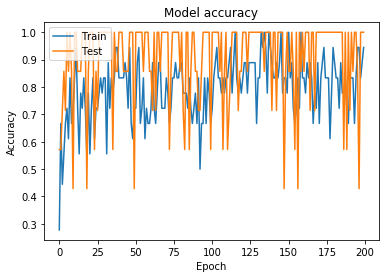

In [25]:
# Визуализация процесса обучения
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history_elu.history['accuracy'])
plt.plot(history_elu.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

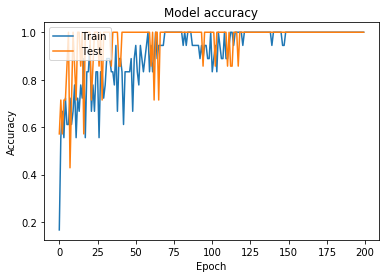

In [30]:
# Визуализация процесса обучения
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history_relu.history['accuracy'])
plt.plot(history_relu.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

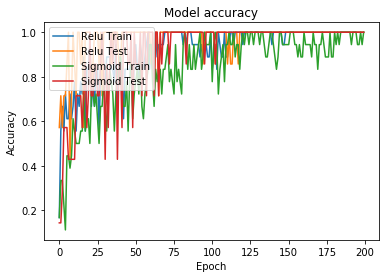

In [49]:
# Визуализация процесса обучения
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history_relu.history['accuracy']) 
plt.plot(history_relu.history['val_accuracy'])
#plt.plot(history_selu.history['accuracy'])
#plt.plot(history_selu.history['val_accuracy'])
plt.plot(history_sigmoid.history['accuracy'])
plt.plot(history_sigmoid.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Relu Train', 'Relu Test','Sigmoid Train', 'Sigmoid Test'], loc = 'upper left')# 'Softmax Train', 'Softmax Test',
plt.show()

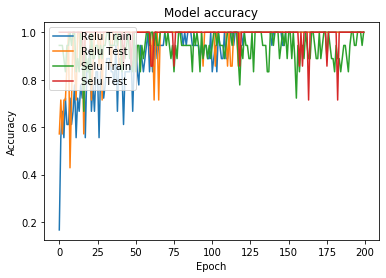

In [50]:
# Визуализация процесса обучения
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history_relu.history['accuracy']) 
plt.plot(history_relu.history['val_accuracy'])
plt.plot(history_selu.history['accuracy']) 
plt.plot(history_selu.history['val_accuracy'])
#plt.plot(history_sigmoid.history['accuracy'])
#plt.plot(history_sigmoid.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Relu Train', 'Relu Test','Selu Train', 'Selu Test'], loc = 'upper left')# 'Softmax Train', 'Softmax Test',
plt.show()

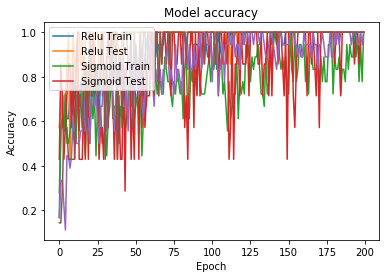

In [32]:
# Визуализация процесса обучения
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history_relu.history['accuracy']) 
plt.plot(history_relu.history['val_accuracy'])
plt.plot(history_selu.history['accuracy'])
plt.plot(history_selu.history['val_accuracy'])
plt.plot(history_sigmoid.history['accuracy'])
plt.plot(history_sigmoid.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Relu Train', 'Relu Test', 'Sigmoid Train', 'Sigmoid Test'], loc = 'upper left')# 'Sigmoid Train', 'Sigmoid Test',
plt.show()

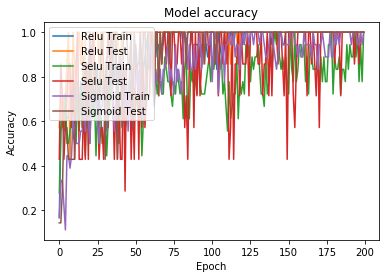

In [33]:
# Визуализация процесса обучения
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history_relu.history['accuracy'])
plt.plot(history_relu.history['val_accuracy'])
plt.plot(history_selu.history['accuracy'])
plt.plot(history_selu.history['val_accuracy'])
plt.plot(history_sigmoid.history['accuracy'])
plt.plot(history_sigmoid.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Relu Train', 'Relu Test','Selu Train', 'Selu Test','Sigmoid Train', 'Sigmoid Test'], loc = 'upper left')
plt.show()

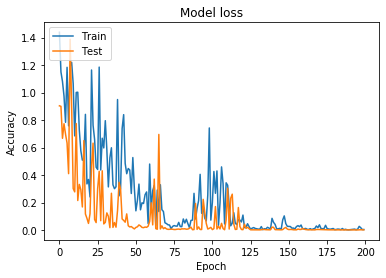

In [34]:
# Plot training & validation loss values
plt.plot(history_relu.history['loss'])
plt.plot(history_relu.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

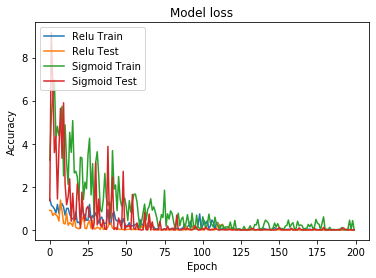

In [51]:
# Plot training & validation loss values
plt.plot(history_relu.history['loss']) 
plt.plot(history_relu.history['val_loss'])
#plt.plot(history_selu.history['loss'])
#plt.plot(history_selu.history['val_loss'])
plt.plot(history_sigmoid.history['loss'])
plt.plot(history_sigmoid.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Relu Train', 'Relu Test','Sigmoid Train', 'Sigmoid Test'], loc = 'upper left')# 'Softmax Train', 'Softmax Test',
plt.show()

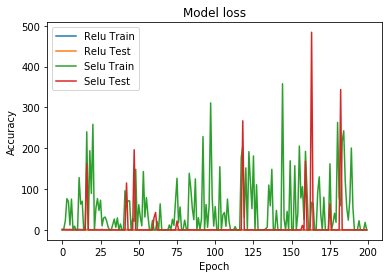

In [55]:
# Plot training & validation loss values
plt.plot(history_relu.history['loss'])
plt.plot(history_relu.history['val_loss'])
plt.plot(history_selu.history['loss']) 
plt.plot(history_selu.history['val_loss'])
#plt.plot(history_sigmoid.history['loss'])
#plt.plot(history_sigmoid.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Relu Train', 'Relu Test', 'Selu Train', 'Selu Test'], loc = 'upper left')#'Sigmoid Train', 'Sigmoid Test',
plt.show()

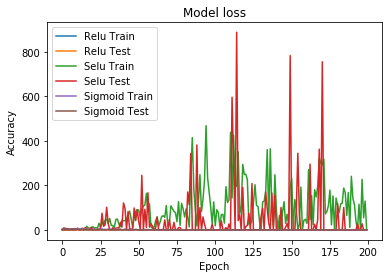

In [37]:
# Plot training & validation loss values
plt.plot(history_relu.history['loss'])
plt.plot(history_relu.history['val_loss'])
plt.plot(history_selu.history['loss'])
plt.plot(history_selu.history['val_loss'])
plt.plot(history_sigmoid.history['loss'])
plt.plot(history_sigmoid.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Relu Train', 'Relu Test','Selu Train', 'Selu Test','Sigmoid Train', 'Sigmoid Test'], loc = 'upper left')
plt.show()

In [39]:
# Предсказание модели
ynew = model1_relu.predict_classes(Xtest)
print(ynew)
l = test_labels2.beh.to_string(index = False)
l = [line.rstrip() for line in l]
str1 = ''.join(l)
print(str1.replace('',' '))

[0 2 1 2 2 2 3]
 0 2 1 2 2 2 3 


In [56]:
ynew = model1_relu.predict_classes(Xtest_ext)
print(ynew)
l = test_labels2_ext.beh.to_string(index = False)
l = [line.rstrip() for line in l]
str1 = ''.join(l)
print(str1.replace('',' '))

[0 2 1 2 2 2 3 0 3 3]
 0 2 1 2 2 2 3 0 2 3 


In [23]:
ynew = model1_selu.predict_classes(Xtest_ext)
print(ynew)
l = test_labels2_ext.beh.to_string(index = False)
l = [line.rstrip() for line in l]
str1 = ''.join(l)
print(str1.replace('',' '))

[0 2 1 2 2 2 3 0 3 3]
 0 2 1 2 2 2 3 0 2 3 


In [42]:
ynew = model1_sigmoid.predict_classes(Xtest_ext)
print(ynew)
l = test_labels2_ext.beh.to_string(index = False)
l = [line.rstrip() for line in l]
str1 = ''.join(l)
print(str1.replace('',' '))

[0 2 1 2 2 2 3 0 3 3]
 0 2 1 2 2 2 3 0 2 3 


In [43]:
print(history_relu.history.keys())

import pandas as pd
import numpy as np


pr_Hist=pd.DataFrame.from_dict(history_relu.history)
pr_Hist.tail()

#optimizer='adam'

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


,loss,accuracy,val_loss,val_accuracy
195,0.006944,1.0,0.001239,1.0
196,0.027110,1.0,0.002160,1.0
197,0.017360,1.0,0.002374,1.0
198,0.004017,1.0,0.001599,1.0
199,0.004300,1.0,0.001490,1.0


# Способ 2

In [150]:
# Построение модели нейронной сети
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow.keras.layers import Activation, Dense

model2 = models.Sequential()
model2.add(layers.Dense(3, activation = 'relu', input_shape=(4,)))
model2.add(layers.Dense(4, activation = 'softmax'))

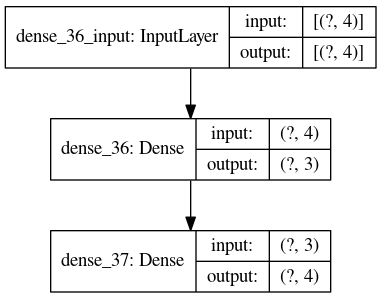

In [151]:
# Просмотр структуры созданной модели
from tensorflow.keras.utils import plot_model
plot_model(model2, to_file='model2.png', show_shapes=True)

In [152]:
# Общая информация о модели
model2.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 3)                 15        
_________________________________________________________________
dense_37 (Dense)             (None, 4)                 16        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


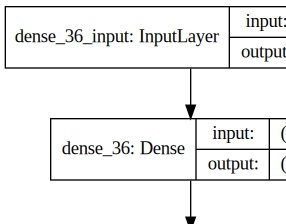

In [153]:
# Визуализация модели
from IPython.display import SVG, display
from tensorflow.python.keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model2, show_shapes=True).create(prog='dot', format='svg'))

In [154]:
# Компиляция модели
from tensorflow.keras.optimizers import SGD

opt = SGD(lr = 0.01, momentum = 0.9)
model2.compile(optimizer = opt,       
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [155]:
# Обучение модели
history = model2.fit(Xtrain, train_labels, validation_data = (Xtest, test_labels), epochs = 200, batch_size = 1)

Epoch 1/200
18/18 [==============================] - 0s 6ms/step - loss: 1.5537 - accuracy: 0.2778 - val_loss: 1.3211 - val_accuracy: 0.1429
Epoch 2/200
18/18 [==============================] - 0s 3ms/step - loss: 1.1907 - accuracy: 0.4444 - val_loss: 1.0516 - val_accuracy: 0.5714
Epoch 3/200
18/18 [==============================] - 0s 2ms/step - loss: 1.1387 - accuracy: 0.4444 - val_loss: 1.0474 - val_accuracy: 0.4286
Epoch 4/200
18/18 [==============================] - 0s 3ms/step - loss: 1.0595 - accuracy: 0.5556 - val_loss: 1.0790 - val_accuracy: 0.5714
Epoch 5/200
18/18 [==============================] - 0s 3ms/step - loss: 1.0311 - accuracy: 0.5556 - val_loss: 0.9155 - val_accuracy: 0.5714
Epoch 6/200
18/18 [==============================] - 0s 3ms/step - loss: 0.9434 - accuracy: 0.6667 - val_loss: 0.7611 - val_accuracy: 0.7143
Epoch 7/200
18/18 [==============================] - 0s 3ms/step - loss: 0.8826 - accuracy: 0.5556 - val_loss: 0.7016 - val_accuracy: 0.7143
Epoch 8/200
1

Epoch 59/200
18/18 [==============================] - 0s 3ms/step - loss: 0.1074 - accuracy: 0.9444 - val_loss: 0.0091 - val_accuracy: 1.0000
Epoch 60/200
18/18 [==============================] - 0s 2ms/step - loss: 0.1205 - accuracy: 0.9444 - val_loss: 0.0082 - val_accuracy: 1.0000
Epoch 61/200
18/18 [==============================] - 0s 3ms/step - loss: 0.1001 - accuracy: 1.0000 - val_loss: 0.0080 - val_accuracy: 1.0000
Epoch 62/200
18/18 [==============================] - 0s 3ms/step - loss: 0.1384 - accuracy: 0.9444 - val_loss: 0.0075 - val_accuracy: 1.0000
Epoch 63/200
18/18 [==============================] - 0s 3ms/step - loss: 0.0940 - accuracy: 1.0000 - val_loss: 0.0074 - val_accuracy: 1.0000
Epoch 64/200
18/18 [==============================] - 0s 2ms/step - loss: 0.0895 - accuracy: 1.0000 - val_loss: 0.0076 - val_accuracy: 1.0000
Epoch 65/200
18/18 [==============================] - 0s 3ms/step - loss: 0.0882 - accuracy: 1.0000 - val_loss: 0.0077 - val_accuracy: 1.0000
Epoch 

18/18 [==============================] - 0s 3ms/step - loss: 0.0152 - accuracy: 1.0000 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 174/200
18/18 [==============================] - 0s 3ms/step - loss: 0.0157 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 175/200
18/18 [==============================] - 0s 3ms/step - loss: 0.0144 - accuracy: 1.0000 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 176/200
18/18 [==============================] - 0s 3ms/step - loss: 0.0145 - accuracy: 1.0000 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 177/200
18/18 [==============================] - 0s 3ms/step - loss: 0.0141 - accuracy: 1.0000 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 178/200
18/18 [==============================] - 0s 3ms/step - loss: 0.0141 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 179/200
18/18 [==============================] - 0s 2ms/step - loss: 0.0139 - accuracy: 1.0000 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 180/200

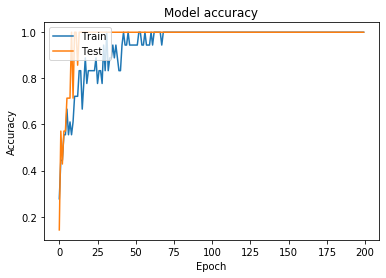

In [156]:
# Визуализация процесса обучения
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

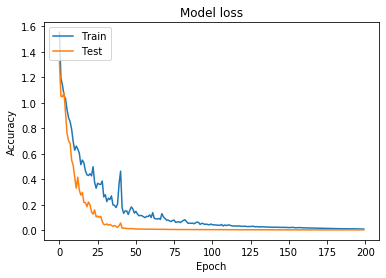

In [157]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

In [158]:
# Предсказание моедли
ynew = model2.predict_classes(Xtest)
print(ynew)
l = test_labels2.beh.to_string(index = False)
l = [line.rstrip() for line in l]
str1 = ''.join(l)
print(str1.replace('',' '))

[0 2 1 2 2 2 3]
 0 2 1 2 2 2 3 


In [160]:
ynew = model2.predict_classes(Xtest_ext)
print(ynew)
l = test_labels2_ext.beh.to_string(index = False)
l = [line.rstrip() for line in l]
str1 = ''.join(l)
print(str1.replace('',' '))

[0 2 1 2 2 2 3 0 3 3]
 0 2 1 2 2 2 3 0 2 3 


In [103]:
print(history.history.keys())

import pandas as pd
import numpy as np


pr_Hist=pd.DataFrame.from_dict(history.history)
pr_Hist.tail()

#optimizer='adam'


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


,loss,accuracy,val_loss,val_accuracy
195,0.021835,1.0,0.004997,1.0
196,0.021436,1.0,0.004881,1.0
197,0.020704,1.0,0.004948,1.0
198,0.020683,1.0,0.004732,1.0
199,0.020650,1.0,0.004806,1.0


### Вывод
    Ниабольшую скорость обучения и точность распознавания, а так же наименьшее количество потерь во время обучения показала модель постороенная первым способом с функцией активации 
    Softmax в последнем слое.

# Литература
* Habr. Веб-сайт. Обучение и оценка модели с Keras. — Режим доступа:[habr.com](https://habr.com/ru/post/485890/),свободный. — Загл. с экрана.

In [7]:
import pandas as pd
import numpy as np

names=['Health','Knife','Gun','Enemies','Kol-vo']
dataTrain = pd.read_csv('data_train_lab5.csv',names=names)
realData = pd.read_csv('data_test_lab5.csv',names=names)

Xtest = realData.iloc[:,0:4]
Ytest = realData.select_dtypes(include=[object])


from sklearn import preprocessing
le = preprocessing.LabelEncoder()

train_b=Ytrain.apply(le.fit_transform)
train_a=Ytest.apply(le.fit_transform)

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
train_labels=to_categorical(train_b)

train_labels1=to_categorical(train_a)

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import utils

model=models.Sequential()
model.add(layers.Dense(3,activation='relu',input_shape=(4,)))
model.add(layers.Dense(4,activation='softmax'))
plot_model(model,to_file='model.png',show_shapes=True)


from tensorflow.keras.optimizers import SGD
opt = SGD(lr=0.001,momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(Xtrain,train_labels,validation_data=(Xtest,train_labels1),epochs=100,batch_size=1)

Epoch 1/100
18/18 [==============================] - 0s 6ms/step - loss: 1.1880 - accuracy: 0.3889 - val_loss: 1.0558 - val_accuracy: 0.7143
Epoch 2/100
18/18 [==============================] - 0s 3ms/step - loss: 1.1680 - accuracy: 0.4444 - val_loss: 1.0231 - val_accuracy: 0.7143
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 1.1557 - accuracy: 0.4444 - val_loss: 1.0008 - val_accuracy: 0.7143
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 1.1397 - accuracy: 0.4444 - val_loss: 0.9699 - val_accuracy: 0.7143
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 1.1299 - accuracy: 0.5000 - val_loss: 0.9540 - val_accuracy: 0.7143
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 1.1191 - accuracy: 0.5000 - val_loss: 0.9220 - val_accuracy: 0.7143
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 1.1084 - accuracy: 0.5556 - val_loss: 0.9129 - val_accuracy: 0.7143
Epoch 8/100
1

Epoch 59/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6818 - accuracy: 0.7222 - val_loss: 0.4613 - val_accuracy: 1.0000
Epoch 60/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6683 - accuracy: 0.8333 - val_loss: 0.4544 - val_accuracy: 1.0000
Epoch 61/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.8333 - val_loss: 0.4520 - val_accuracy: 1.0000
Epoch 62/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6582 - accuracy: 0.8333 - val_loss: 0.4418 - val_accuracy: 1.0000
Epoch 63/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6503 - accuracy: 0.8333 - val_loss: 0.4358 - val_accuracy: 1.0000
Epoch 64/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6453 - accuracy: 0.8333 - val_loss: 0.4287 - val_accuracy: 1.0000
Epoch 65/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6425 - accuracy: 0.8333 - val_loss: 0.4242 - val_accuracy: 1.0000
Epoch 